In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from dataprep.eda import create_report

Loading the data

In [14]:
fitbit_df = pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,621e375b67b776a240290cdc,2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7417,621e375b67b776a240290cdc,2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7418,621e375b67b776a240290cdc,2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7419,621e375b67b776a240290cdc,2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0


In [15]:
print("Fitbit duplicates based on ID and Date: {}".format(fitbit_df[fitbit_df.duplicated(subset=['id','date'], keep=False)].shape[0]))
fitbit_df = fitbit_df.drop_duplicates(subset=["id", "date"], keep='first')
fitbit_df

Fitbit duplicates based on ID and Date: 136


,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,621e375b67b776a240290cdc,2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7417,621e375b67b776a240290cdc,2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7418,621e375b67b776a240290cdc,2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0
7419,621e375b67b776a240290cdc,2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,23.0


In [16]:
# keep only experiments dates
fitbit_df = fitbit_df.loc[((fitbit_df['date'] >'2021-05-23') & (fitbit_df['date'] <'2021-07-27')) | ((fitbit_df['date'] >'2021-11-14') & (fitbit_df['date'] <'2022-01-18'))]
fitbit_df.reset_index(inplace=True, drop=True)
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,2021-07-22,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000,...,NaN,NaN,6805.0,57.0,1383.0,0.0,0.0,<30,FEMALE,23.0
4903,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,NaN,16.6,81.0,0.700000,0.800,...,0.960177,1.153846,13187.0,366.0,1036.0,37.0,0.0,<30,FEMALE,23.0
4904,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,NaN,17.0,84.0,0.833333,0.900,...,1.276786,1.259259,13554.0,286.0,1152.0,2.0,0.0,<30,FEMALE,23.0
4905,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,NaN,18.0,84.0,0.833333,0.900,...,0.983051,0.800000,13638.0,347.0,1083.0,0.0,0.0,<30,FEMALE,23.0


Replace date with other date extracted features

In [17]:
fitbit_df['date'] = pd.to_datetime(fitbit_df.date, format='%m/%d/%y %H:%M:%S')
fitbit_df = fitbit_df.astype({"date": str})
fitbit_df["year"] = fitbit_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
fitbit_df["month"] = fitbit_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
fitbit_df["weekday"] = fitbit_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
fitbit_df["week"] = fitbit_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar()[1])
fitbit_df["day"] = fitbit_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

C:\Users\evapa\AppData\Local\Temp\ipykernel_10632\3147853857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitbit_df['date'] = pd.to_datetime(fitbit_df.date, format='%m/%d/%y %H:%M:%S')


In [18]:
def sin_transform(values):
    return np.sin(2 * np.pi * values / len(set(values)))

def cos_transform(values):
    return np.cos(2 * np.pi * values / len(set(values)))

In [19]:
fitbit_df["month_sin"] = sin_transform(fitbit_df["month"])
fitbit_df["weekday_sin"] = sin_transform(fitbit_df["weekday"])
fitbit_df["week_sin"] = sin_transform(fitbit_df["week"])
fitbit_df["day_sin"] = sin_transform(fitbit_df["day"])
fitbit_df["month_cos"] = cos_transform(fitbit_df["month"])
fitbit_df["weekday_cos"] = cos_transform(fitbit_df["weekday"])
fitbit_df["week_cos"] = cos_transform(fitbit_df["week"])
fitbit_df["day_cos"] = cos_transform(fitbit_df["day"])
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,week,day,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,21,24,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,21,25,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,21,26,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,21,27,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,21,28,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,2021-07-22,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000,...,29,22,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653
4903,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,NaN,16.6,81.0,0.700000,0.800,...,29,23,0.866025,-0.433884,3.090170e-01,-0.998717,0.5,-0.900969,-0.951057,-0.050649
4904,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,NaN,17.0,84.0,0.833333,0.900,...,29,24,0.866025,-0.974928,3.090170e-01,-0.988468,0.5,-0.222521,-0.951057,0.151428
4905,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,NaN,18.0,84.0,0.833333,0.900,...,29,25,0.866025,-0.781831,3.090170e-01,-0.937752,0.5,0.623490,-0.951057,0.347305


Drop extra columns (for date)

In [20]:
fitbit_df=fitbit_df.drop(columns=['year', 'month', 'weekday', 'week', 'day'])
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,MALE,<19,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,MALE,<19,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,MALE,<19,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,MALE,<19,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,MALE,<19,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,2021-07-22,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000,...,FEMALE,23.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653
4903,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,NaN,16.6,81.0,0.700000,0.800,...,FEMALE,23.0,0.866025,-0.433884,3.090170e-01,-0.998717,0.5,-0.900969,-0.951057,-0.050649
4904,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,NaN,17.0,84.0,0.833333,0.900,...,FEMALE,23.0,0.866025,-0.974928,3.090170e-01,-0.988468,0.5,-0.222521,-0.951057,0.151428
4905,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,NaN,18.0,84.0,0.833333,0.900,...,FEMALE,23.0,0.866025,-0.781831,3.090170e-01,-0.937752,0.5,0.623490,-0.951057,0.347305


In [21]:
fitbit_df.to_pickle('./data/fitbit_to_model.pkl')

In [12]:
fitbit_df = pd.read_pickle('./data/fitbit_to_model.pkl')
fitbit_df = fitbit_df.drop(columns=['id', 'date'])
fitbit_df

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,MALE,<19,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428
1,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,MALE,<19,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305
2,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,MALE,<19,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964
3,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,MALE,<19,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967
4,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,MALE,<19,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000,0.000000,NaN,...,FEMALE,23.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653
4903,34.011607,55.542,30.813,NaN,16.6,81.0,0.700000,0.800,0.933333,-1.467558,...,FEMALE,23.0,0.866025,-0.433884,3.090170e-01,-0.998717,0.5,-0.900969,-0.951057,-0.050649
4904,33.687826,69.579,19.407,NaN,17.0,84.0,0.833333,0.900,0.766667,-2.258333,...,FEMALE,23.0,0.866025,-0.974928,3.090170e-01,-0.988468,0.5,-0.222521,-0.951057,0.151428
4905,34.112386,65.899,22.892,NaN,18.0,84.0,0.833333,0.900,0.766667,-1.309401,...,FEMALE,23.0,0.866025,-0.781831,3.090170e-01,-0.937752,0.5,0.623490,-0.951057,0.347305


fitbit_df analysis and visualizations

In [15]:
create_report(fitbit_df).show_browser()

  0%|          | 0/9813 [00:00<?, ?it/s]

C:\Users\evapa\miniconda3\envs\RAIS-miniproject\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\evapa\miniconda3\envs\RAIS-miniproject\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\evapa\miniconda3\envs\RAIS-miniproject\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
C:\Users\evapa\miniconda3\envs\RAIS-miniproject\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, ind

Pycaret

In [3]:
import pycaret
from pycaret.classification import *

Gender prediction

In [5]:
data = fitbit_df.drop(columns=['age', 'bmi'])

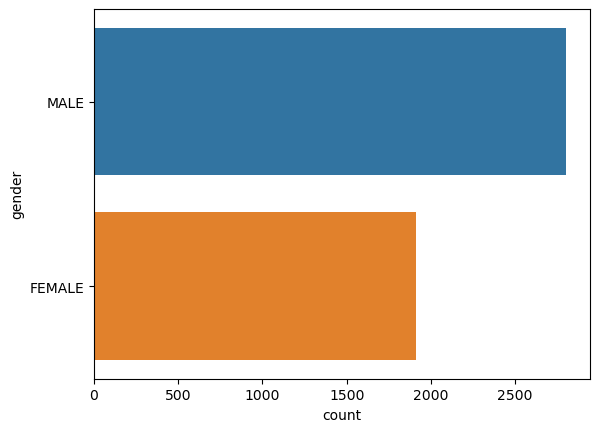

In [7]:
sns.countplot(y="gender", data=data)

In [5]:
s = setup(data=data, target='gender', silent=True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"FEMALE: 0, MALE: 1"
4,Original Data,"(4907, 47)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='gender',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9849,0.9985,0.9888,0.9859,0.9873,0.9686,0.9687,1.3700
gbc,Gradient Boosting Classifier,0.9664,0.9929,0.9721,0.9716,0.9718,0.9303,0.9304,4.0050
rf,Random Forest Classifier,0.9525,0.9847,0.9777,0.9450,0.9609,0.9005,0.9018,1.1840
ada,Ada Boost Classifier,0.9498,0.9802,0.9543,0.9613,0.9577,0.8959,0.8961,1.6240
dt,Decision Tree Classifier,0.9325,0.9305,0.9431,0.9438,0.9433,0.8600,0.8604,0.6130
ridge,Ridge Classifier,0.9304,0.0000,0.9517,0.9332,0.9422,0.8548,0.8556,2.2740
et,Extra Trees Classifier,0.9150,0.9604,0.9614,0.9027,0.9310,0.8207,0.8239,1.9210
lda,Linear Discriminant Analysis,0.8578,0.9022,0.8603,0.8977,0.8781,0.7077,0.7097,3.4210
knn,K Neighbors Classifier,0.6924,0.7907,0.7161,0.7554,0.7348,0.3691,0.3704,0.8970
lr,Logistic Regression,0.6815,0.7846,0.6942,0.7527,0.7220,0.3504,0.3524,1.4540


create_model_container: 14
master_model_container: 14
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


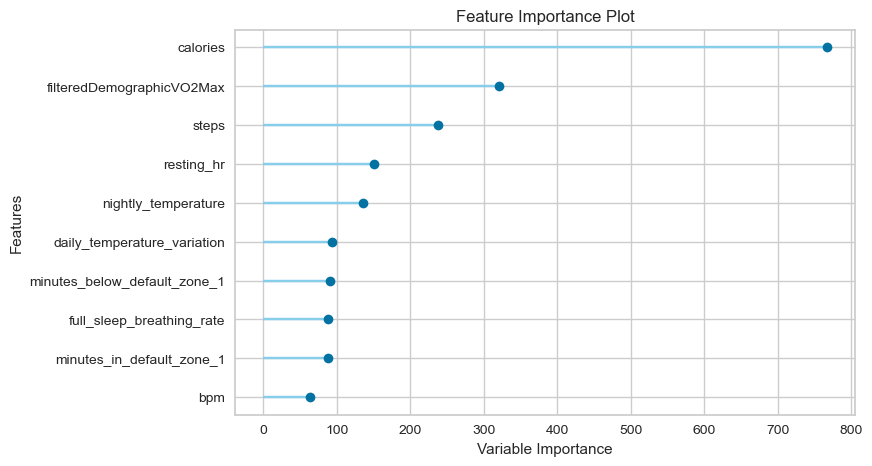

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [7]:
plot_model(best, plot='feature')

Age prediction

In [10]:
data = fitbit_df.drop(columns=['gender', 'bmi'])

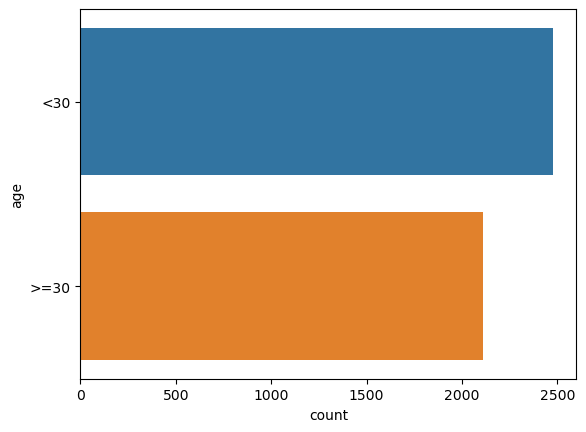

In [11]:
sns.countplot(y="age", data=data)

In [9]:
s = setup(data=data, target='age', silent=True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"<30: 0, >=30: 1"
4,Original Data,"(4907, 47)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9360,0.9868,0.9314,0.9307,0.9307,0.8713,0.8718,0.8930
dt,Decision Tree Classifier,0.8686,0.8680,0.8608,0.8565,0.8583,0.7358,0.7364,0.9330
gbc,Gradient Boosting Classifier,0.8568,0.9358,0.8231,0.8614,0.8416,0.7110,0.7119,4.5850
rf,Random Forest Classifier,0.8015,0.8568,0.7552,0.8045,0.7784,0.5990,0.6007,1.5430
ada,Ada Boost Classifier,0.7953,0.8796,0.7626,0.7887,0.7749,0.5873,0.5882,1.6930
et,Extra Trees Classifier,0.7546,0.7908,0.6934,0.7562,0.7229,0.5034,0.5055,2.0230
ridge,Ridge Classifier,0.6514,0.0000,0.5427,0.6469,0.5897,0.2908,0.2946,2.5470
knn,K Neighbors Classifier,0.6344,0.7077,0.6355,0.5982,0.6160,0.2677,0.2684,0.9730
nb,Naive Bayes,0.6049,0.6216,0.3827,0.6167,0.4710,0.1831,0.1967,0.7540
lda,Linear Discriminant Analysis,0.6033,0.6117,0.5117,0.5801,0.5433,0.1952,0.1966,3.8980


create_model_container: 14
master_model_container: 14
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


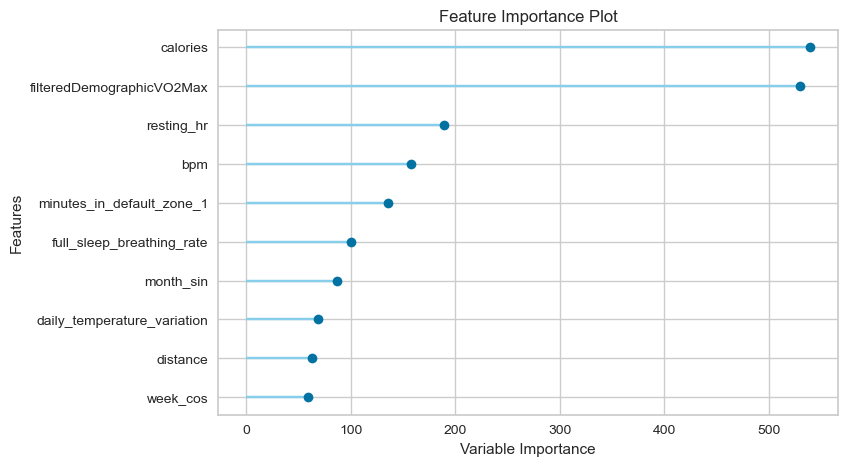

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [11]:
plot_model(best, plot='feature')

BMI prediction

In [13]:
data = fitbit_df.drop(columns=['gender', 'age'])

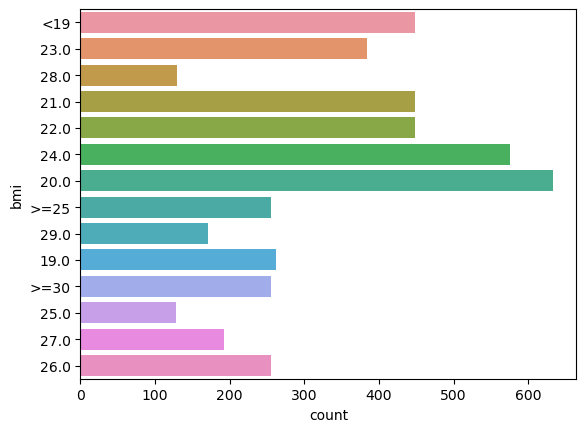

In [14]:
sns.countplot(y="bmi", data=data)

In [13]:
s = setup(data=data, target='bmi', silent=True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,bmi
2,Target Type,Multiclass
3,Label Encoded,"19.0: 0, 20.0: 1, 21.0: 2, 22.0: 3, 23.0: 4, 24.0: 5, 25.0: 6, 26.0: 7, 27.0: 8, 28.0: 9, 29.0: 10, <19: 11, >=25: 12, >=30: 13"
4,Original Data,"(4907, 47)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='bmi',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [14]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9285,0.9953,0.9268,0.9314,0.9286,0.9217,0.9219,4.9570
dt,Decision Tree Classifier,0.7931,0.8870,0.7975,0.7998,0.7931,0.7735,0.7740,0.9430
gbc,Gradient Boosting Classifier,0.7794,0.9716,0.7854,0.7886,0.7793,0.7586,0.7593,106.2620
rf,Random Forest Classifier,0.7012,0.9364,0.6940,0.7086,0.6995,0.6727,0.6735,1.9790
et,Extra Trees Classifier,0.6424,0.9178,0.6106,0.6478,0.6394,0.6077,0.6086,3.0470
knn,K Neighbors Classifier,0.3470,0.6987,0.3777,0.3758,0.3508,0.2885,0.2902,1.2700
ridge,Ridge Classifier,0.3290,0.0000,0.3287,0.3475,0.3243,0.2724,0.2749,3.4880
lda,Linear Discriminant Analysis,0.2784,0.7025,0.2783,0.2980,0.2772,0.2170,0.2186,6.0050
nb,Naive Bayes,0.1569,0.6785,0.2215,0.2248,0.1371,0.1116,0.1199,0.8030
ada,Ada Boost Classifier,0.1261,0.6048,0.1791,0.1032,0.0810,0.0776,0.0972,2.8680


create_model_container: 14
master_model_container: 14
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


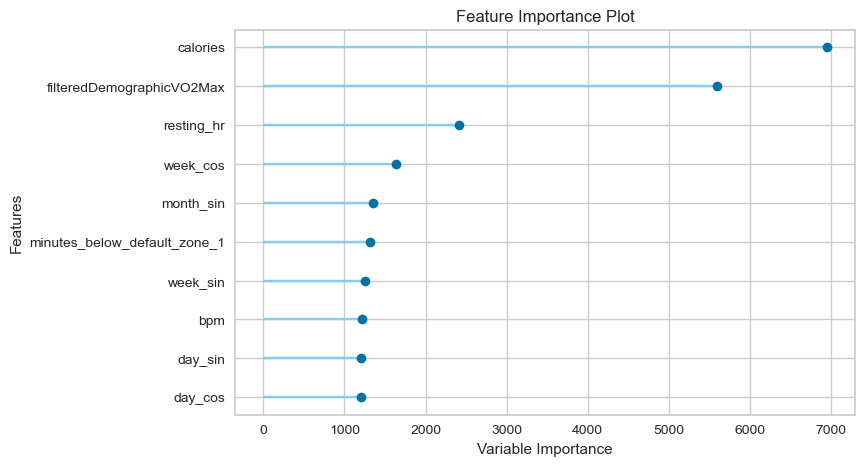

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [15]:
plot_model(best, plot='feature')

VO2Max prediction

In [4]:
from pycaret.regression import *

In [5]:
data = fitbit_df.drop(columns=['gender', 'age', 'bmi'])

Don't look for imbalance in regression

In [6]:
s = setup(data=data, target='filteredDemographicVO2Max', session_id=123)

,Description,Value
0,session_id,123
1,Target,filteredDemographicVO2Max
2,Original Data,"(4907, 46)"
3,Missing Values,True
4,Numeric Features,36
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2640, 1644)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='filteredDemographicVO2Max',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='filteredDemographicVO2Max')),
                ('fix_perfect', Remove_100(target='fi

In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.7612,15.1553,3.8839,0.6812,0.0852,0.0623,0.9710
et,Extra Trees Regressor,2.6820,15.1831,3.8861,0.6806,0.0854,0.0608,5.9480
rf,Random Forest Regressor,2.7193,15.6935,3.9475,0.6705,0.0864,0.0613,4.8340
gbr,Gradient Boosting Regressor,3.6593,22.9535,4.7805,0.5171,0.1052,0.0829,4.3210
dt,Decision Tree Regressor,3.2523,30.9123,5.5515,0.3461,0.1195,0.0724,0.1900
ada,AdaBoost Regressor,4.6613,31.8076,5.6331,0.3277,0.1237,0.1061,3.5520
en,Elastic Net,4.5795,33.6709,5.7842,0.2929,0.1264,0.1034,0.9250
lasso,Lasso Regression,4.6235,34.0001,5.8121,0.2861,0.1271,0.1045,0.9540
br,Bayesian Ridge,4.4635,35.5518,5.9159,0.2388,0.1255,0.1006,190.5530
lr,Linear Regression,4.4996,37.6283,6.0617,0.1902,0.1273,0.1014,2.0840


create_model_container: 18
master_model_container: 18
display_container: 2
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


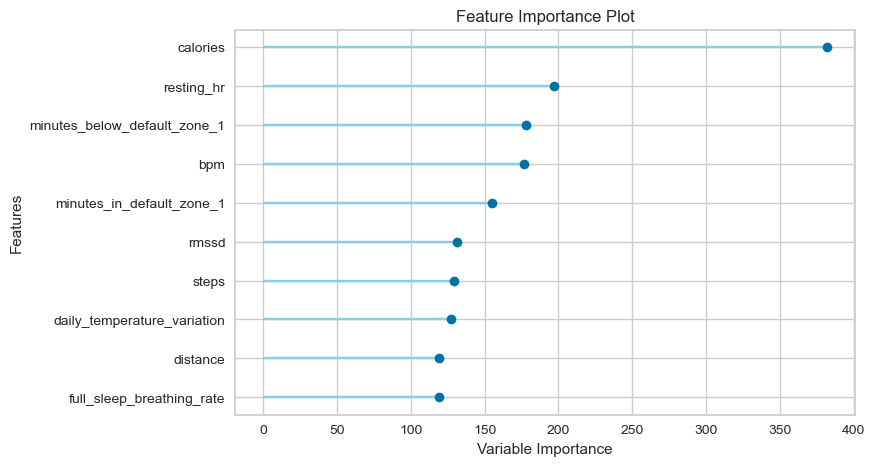

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [8]:
plot_model(best, plot='feature')